## Predict if a customer will make a possible transaction in future or not

In [3]:
import sys
#Change path to wherever you place this project
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\Santander')

#Do all imports
from Santander import *
from Santander.config import *

Using TensorFlow backend.


In [77]:
data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

full_data = [data,test] #this list will be used iterate for cleanup purposes

In [35]:
data.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [36]:
#Size of dataset and testset
data.shape,test.shape

((200000, 202), (12886, 201))

In [105]:
#Since columns are huge, let us see overview of data type spresent
data.dtypes.unique()
#mainly numeric and ID_Code as object

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [78]:
#Let's drop ID_code - just ordering of observations, we have row index for that
data = data.drop(['ID_code'], axis =1)
test = test.drop(['ID_code'], axis =1)

full_data=[data,test]#update
data.shape,test.shape

((200000, 201), (12886, 200))

In [111]:
#Let us get the glimpse of continous and categorical column features we have
continous_names, cat_names = get_col_names(data)
print('-----Summary of columns')
print('Total col -',data.shape[1] )
print('-------------------------')
print('continous -', len(continous_names))
print(data[continous_names].head(1))
print('-------------------------')
print('-------------------------')
print('categorical  -', len(cat_names))
print(data[cat_names].head(1))
print('-------------------------')
#PS:#iloc To be used for column index and loc when you have column name instead


-----Summary of columns
Total col - 201
-------------------------
continous - 201
   target   var_0   var_1    var_2  var_3    var_4   var_5   var_6    var_7  \
0       0  8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187  18.6266   

   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  -4.92  ...   4.4354   3.9642   3.1364    1.691  18.5227  -2.3978   7.8784   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  

[1 rows x 201 columns]
-------------------------
-------------------------
categorical  - 0
Empty DataFrame
Columns: []
Index: [0]
-------------------------


## Missing value analysis


In [112]:
for i,item in enumerate(full_data):
    mis = item.isnull().sum()
    txt = 'train' if i == 0 else 'test'
    if np.any(mis > 0) == False:
        print('No Missing values in ',txt)
    else:
        print('Missing values exist in',txt)


No Missing values in  train
Missing values exist in test


## Missing value percentages
We need to see percentage wise and drop column if >30% is missing

In [113]:
#Get the missing percentages for both train and test
missing_values = {}
for i,item in enumerate(full_data):
    # if i == 0:
    #    continue
    txt = 'Train' if i == 0 else 'Test'
    #get the rows with null values
    missing_values[txt] = pd.DataFrame(item.isnull().sum())
    #rename the columns old value: 0, new_value:'missing_per'
    missing_values[txt] = missing_values[txt].rename(columns = {'index':'variable', 0:'missing_per'})
    missing_values[txt]['missing_per'] = (missing_values[txt]['missing_per']/len(data))*100

In [116]:
#See missing percentages
missing_values['Train'][missing_values['Train']['missing_per']>0].head()
missing_values['Test'][missing_values['Test']['missing_per']>0].head()

,missing_per
var_10,0.0005
var_11,0.0005
var_12,0.0005
var_13,0.0005
var_14,0.0005


In [79]:
# Impute the missing values for training and test dataset
for i,dataset in enumerate(full_data):
    for col in full_data[i].columns:
        full_data[i].loc[:,col] = full_data[i].loc[:,col].fillna(full_data[i].loc[:,col].mean())#Replace with mean

In [118]:
#Get the missing percentages for both train and test
missing_values = {}
for i,item in enumerate(full_data):
    # if i == 0:
    #    continue
    txt = 'Train' if i == 0 else 'Test'
    #get the rows with null values
    missing_values[txt] = pd.DataFrame(item.isnull().sum())
    #rename the columns old value: 0, new_value:'missing_per'
    missing_values[txt] = missing_values[txt].rename(columns = {'index':'variable', 0:'missing_per'})
    missing_values[txt]['missing_per'] = (missing_values[txt]['missing_per']/len(data))*100

In [119]:
#See missing percentages
print(np.any(test.isnull().sum()==1))
missing_values['Test'][missing_values['Test']['missing_per']==0.0005].head()

False


,missing_per


# Univariate analysis

In [52]:
# Negative value analysis
summary = data.describe()  
neg_col = []
for col in summary:
    #print(type(summary.loc[:,col]))
    if (summary.loc[:,col].loc['min'] < 0):
        neg_col.append([col])
print('Col having negative values before processing:',len(neg_col))

Col having negative values before processing: 131


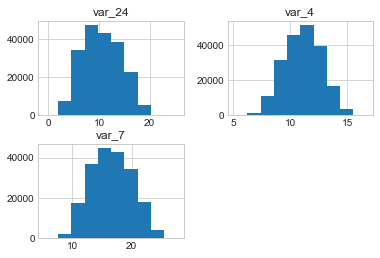

In [122]:
#Histogram before processing
data[['var_4','var_7','var_24']].hist()
plt.savefig('../data/processed/hist_before.png',bbox_inches='tight')

---------------original-var_4---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.04820946777992147
%%%%% Moderately symm
Kurtosis :  -0.5350094473363463
~~~~~~~~Flat
---------------log-var_4---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.3922994139458509
%%%%% Moderately symm
Kurtosis :  -0.24104428592925098
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_4---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.21612310347972108
%%%%% Moderately symm
Kurtosis :  -0.43901644549815755
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_4---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.2738178868550175
%%%%% Moderately symm
Kurtosis :  -0.38538764256928415
%%%%%%%%%%%%%% Moderately Bell shaped


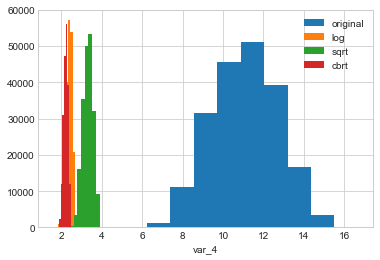

In [80]:
# Get skewness and Kurtosis to analyze the shape of distribution for var
var = data.var_4
col = 'var_4'
skew_kurt_dic={}
skew_kurt_dic[col]={}
skew_kurt_dic = skew_kurt_analysis((var),'original',col, skew_kurt_dic,True)
if(not (len(data[data.var_0 == 0]) > 0) ):#If no zero value
    skew_kurt_dic = skew_kurt_analysis(np.log(var),'log',col,skew_kurt_dic,True)
else:
    skew_kurt_dic['log'] =(-1,-1)
skew_kurt_dic = skew_kurt_analysis(np.sqrt(var),'sqrt',col,skew_kurt_dic,True)
skew_kurt_dic = skew_kurt_analysis(np.cbrt(var),'cbrt',col,skew_kurt_dic,True)

plt.legend(loc='upper right')
plt.xlabel(col)
plt.savefig('../data/processed/skew_anal_%s'%col,bbox_inches='tight')

#Following gives the results for var with original values,log,sqrt,cbrt and plots histogram to see distribution

## Insight
log data is the best 

---------------original-var_7---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  0.08459700661643049
%%%%% Moderately symm
Kurtosis :  -0.6710274501066511
~~~~~~~~Flat
---------------log-var_7---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.34956609209222467
%%%%% Moderately symm
Kurtosis :  -0.4503816291701672
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_7---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.1272589417078805
%%%%% Moderately symm
Kurtosis :  -0.6333831565536716
~~~~~~~~Flat
---------------cbrt-var_7---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.2000355830220948
%%%%% Moderately symm
Kurtosis :  -0.5897755295471288
~~~~~~~~Flat


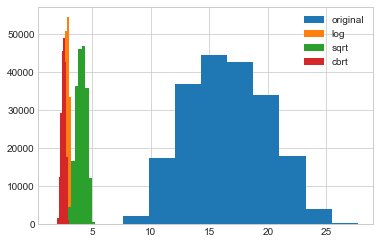

In [128]:
#Just update 'col' and 'var' and run this code to see customised results
var = data.var_7
col = 'var_7'
skew_kurt_dic={}
skew_kurt_dic[col]={}
skew_kurt_dic = skew_kurt_analysis((var),'original',col, skew_kurt_dic,True)
if(not (len(data[data.var_0 == 0]) > 0) ):#If no zero value
    skew_kurt_dic = skew_kurt_analysis(np.log(var),'log',col,skew_kurt_dic,True)
else:
    skew_kurt_dic['log'] =(-1,-1)
skew_kurt_dic = skew_kurt_analysis(np.sqrt(var),'sqrt',col,skew_kurt_dic,True)
skew_kurt_dic = skew_kurt_analysis(np.cbrt(var),'cbrt',col,skew_kurt_dic,True)

plt.legend(loc='upper right')

## Insight
log is best

## Calculate skew and kurtosis value for each column
Let us go through all the columns and get the best functions for each column , so that a better distribution can be acheived

In [81]:
skew_kurt_dic_={}
for i,dataset in enumerate(full_data):#for both train and test data
    txt = 'train' if i ==0 else 'test'
    skew_kurt_dic_[txt] = {}
    for col in dataset.columns:
        var = full_data[i].loc[:,col]
        skew_kurt_dic_[txt][col] = {}
        skew_kurt_dic_[txt] = skew_kurt_analysis((var),'original', col , skew_kurt_dic_[txt])
        if(not (len(data[data.var_0 == 0]) > 0) ):#If no zero value
            skew_kurt_dic_[txt] = skew_kurt_analysis(np.log(var),'log', col, skew_kurt_dic_[txt])
        else:
            skew_kurt_dic_[txt]['log'] =(-1,-1)
        skew_kurt_dic_[txt] = skew_kurt_analysis(np.sqrt(var),'sqrt', col, skew_kurt_dic_[txt])
        skew_kurt_dic_[txt] = skew_kurt_analysis(np.cbrt(var),'cbrt', col, skew_kurt_dic_[txt])

    

---------------original-target---------------
Skewness :  2.6576221153813613
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  5.0629553081640974
^^^^^^Pointy
---------------log-target---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-target---------------
Skewness :  2.6576221153813613
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  5.0629553081640974
^^^^^^Pointy
---------------cbrt-target---------------
Skewness :  2.6576221153813613
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  5.0629553081640974
^^^^^^Pointy
---------------original-var_0---------------
Skewness :  0.23563698750480275
%%%%% Moderately symm
Kurtosis :  -0.2736156988689329
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_0---------------
Skewness :  -0.6417424309363221
+++++++ very ---------- Left/negative(tail/majority t

Kurtosis :  -0.3347806147375141
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_13---------------
Skewness :  -0.17689568928206165
%%%%% Moderately symm
Kurtosis :  -0.6538524945185649
~~~~~~~~Flat
---------------log-var_13---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_13---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_13---------------
Skewness :  -2.9002914591550635
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  10.25604419691646
^^^^^^Pointy
---------------original-var_14---------------
Skewness :  0.038347020680448374
%%%%% Moderately symm
Kurtosis :  -0.7612883456459341
~~~~~~~~Flat
---------------log-var_14---------------
Skewness :  -0.6222757423263402
+++++++ very ---------- Left/negative(tail/majority towa

Kurtosis :  -0.3517187349937956
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_25---------------
Skewness :  0.15015672150006837
%%%%% Moderately symm
Kurtosis :  -0.33902055643548623
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_25---------------
Skewness :  0.14162081495902218
%%%%% Moderately symm
Kurtosis :  -0.3434763746000167
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_26---------------
Skewness :  0.17276859940158149
%%%%% Moderately symm
Kurtosis :  -0.2500089212356644
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_26---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_26---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_26---------------
Skewness :  1.0166350001461852
+++++++ very Right/positive(tail/ma

Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_38---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_38---------------
Skewness :  -1.996933280718399
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  12.84574741180628
^^^^^^Pointy
---------------original-var_39---------------
Skewness :  -0.05548707338424528
%%%%% Moderately symm
Kurtosis :  -0.43427228067608104
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_39---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_39---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_39---------------
Skewness :  -0.22491690981399542
%%%%% Moderately symm
Kurtosis :  -1.6756308238725237
~~

Skewness :  -2.488121994658486
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  7.205431410374624
^^^^^^Pointy
---------------original-var_52---------------
Skewness :  -0.012291592246941716
%%%%% Moderately symm
Kurtosis :  -0.34996288223270566
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_52---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_52---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_52---------------
Skewness :  0.6900540083226336
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  -1.1750281422742472
~~~~~~~~Flat
---------------original-var_53---------------
Skewness :  0.07403156365202625
%%%%% Moderately symm
Kurtosis :  -0.44552123386549747
%%%%%%%%%%%%%% Moderately Bell shaped
--------

---------------log-var_65---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_65---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_65---------------
Skewness :  -0.3535927424526826
%%%%% Moderately symm
Kurtosis :  -1.594646802021106
~~~~~~~~Flat
---------------original-var_66---------------
Skewness :  0.06661873078477147
%%%%% Moderately symm
Kurtosis :  -0.43108877471575946
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_66---------------
Skewness :  -0.43381626048584526
%%%%% Moderately symm
Kurtosis :  0.00979653956048665
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_66---------------
Skewness :  -0.1733413821878988
%%%%% Moderately symm
Kurtosis :  -0.32823534919184016
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_66-----------

Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_78---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_78---------------
Skewness :  -1.0634947956662537
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  3.694374871316601
^^^^^^Pointy
---------------original-var_79---------------
Skewness :  0.09026555408039665
%%%%% Moderately symm
Kurtosis :  -0.6587203623975726
~~~~~~~~Flat
---------------log-var_79---------------
Skewness :  -0.09044186517585617
%%%%% Moderately symm
Kurtosis :  -0.6718586156378086
~~~~~~~~Flat
---------------sqrt-var_79---------------
Skewness :  -0.00014313577686027039
%%%%% Moderately symm
Kurtosis :  -0.67759184288929
~~~~~~~~Flat
---------------cbrt-var_79---------------
Skewness :  -0.030244692040968
%%%%% Moderately symm
Kurtosis

Skewness :  0.055131928593965956
%%%%% Moderately symm
Kurtosis :  -0.6130361468217371
~~~~~~~~Flat
---------------cbrt-var_91---------------
Skewness :  0.04758376242356407
%%%%% Moderately symm
Kurtosis :  -0.6150906282338089
~~~~~~~~Flat
---------------original-var_92---------------
Skewness :  0.02644095018569404
%%%%% Moderately symm
Kurtosis :  -0.5569193691452341
~~~~~~~~Flat
---------------log-var_92---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_92---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_92---------------
Skewness :  -0.5921066396551373
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  0.5216714406499015
^^^^^^Pointy
---------------original-var_93---------------
Skewness :  -0.2380888578639778
%%%%% Moderately symm
Kurt

Skewness :  -0.16627921045834773
%%%%% Moderately symm
Kurtosis :  -0.30472524084005004
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_104---------------
Skewness :  -0.24071651987621934
%%%%% Moderately symm
Kurtosis :  -0.24446432547216324
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_105---------------
Skewness :  0.12460513448594482
%%%%% Moderately symm
Kurtosis :  -0.21471456873354766
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_105---------------
Skewness :  -0.47468332772110344
%%%%% Moderately symm
Kurtosis :  0.379831114229348
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_105---------------
Skewness :  -0.15924667785145188
%%%%% Moderately symm
Kurtosis :  -0.10230639234374106
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_105---------------
Skewness :  -0.25995156896262517
%%%%% Moderately symm
Kurtosis :  0.007686863732816462
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_10

---------------sqrt-var_117---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_117---------------
Skewness :  -1.750591152772557
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  2.054411260029471
^^^^^^Pointy
---------------original-var_118---------------
Skewness :  -0.043565688626787974
%%%%% Moderately symm
Kurtosis :  -0.40630178200442524
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_118---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_118---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_118---------------
Skewness :  0.8004078137405646
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  -0.9

Skewness :  -0.10250033784084576
%%%%% Moderately symm
Kurtosis :  -0.580408895346296
~~~~~~~~Flat
---------------sqrt-var_130---------------
Skewness :  -0.030536187454044936
%%%%% Moderately symm
Kurtosis :  -0.5885554404803237
~~~~~~~~Flat
---------------cbrt-var_130---------------
Skewness :  -0.05452455652314597
%%%%% Moderately symm
Kurtosis :  -0.587656367919132
~~~~~~~~Flat
---------------original-var_131---------------
Skewness :  -0.14014242542651845
%%%%% Moderately symm
Kurtosis :  -0.6209106166079832
~~~~~~~~Flat
---------------log-var_131---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_131---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_131---------------
Skewness :  -1.7089683481841154
+++++++ very ---------- Left/negative(tail/majority towards left) skewed

Skewness :  -0.43391678068496925
%%%%% Moderately symm
Kurtosis :  -0.02189720958741459
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_143---------------
Skewness :  -0.5538024572512822
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  0.17688992930192526
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_144---------------
Skewness :  0.009341253400661853
%%%%% Moderately symm
Kurtosis :  -0.5055779776483269
~~~~~~~~Flat
---------------log-var_144---------------
Skewness :  -0.23647288585553783
%%%%% Moderately symm
Kurtosis :  -0.39118999217636974
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_144---------------
Skewness :  -0.1122942323020112
%%%%% Moderately symm
Kurtosis :  -0.47233969582823976
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_144---------------
Skewness :  -0.1533743607736723
%%%%% Moderately symm
Kurtosis :  -0.4508251183109411
%%%%%%%%%%%%%% Moderately Bell shaped
------

---------------log-var_156---------------
Skewness :  -0.04898267898784308
%%%%% Moderately symm
Kurtosis :  -0.6819918019556708
~~~~~~~~Flat
---------------sqrt-var_156---------------
Skewness :  0.022379438077817306
%%%%% Moderately symm
Kurtosis :  -0.6861365532243333
~~~~~~~~Flat
---------------cbrt-var_156---------------
Skewness :  -0.0013899195683798183
%%%%% Moderately symm
Kurtosis :  -0.686465553066764
~~~~~~~~Flat
---------------original-var_157---------------
Skewness :  0.1536522001105907
%%%%% Moderately symm
Kurtosis :  -0.3628957201257603
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_157---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_157---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_157---------------
Skewness :  1.2693155776824965
++++++

---------------log-var_169---------------
Skewness :  -0.1692851627702087
%%%%% Moderately symm
Kurtosis :  -0.411621322103386
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_169---------------
Skewness :  -0.09243869120477993
%%%%% Moderately symm
Kurtosis :  -0.4403705648902485
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_169---------------
Skewness :  -0.11800791201534568
%%%%% Moderately symm
Kurtosis :  -0.43275869090620445
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_170---------------
Skewness :  0.10299358071505195
%%%%% Moderately symm
Kurtosis :  -0.31413325951714244
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_170---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_170---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
-----

Skewness :  0.07552057476808959
%%%%% Moderately symm
Kurtosis :  -0.5934789841220507
~~~~~~~~Flat
---------------log-var_183---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_183---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_183---------------
Skewness :  -2.7925201145414285
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  12.333231392265857
^^^^^^Pointy
---------------original-var_184---------------
Skewness :  0.14463918815441343
%%%%% Moderately symm
Kurtosis :  -0.5273762512106219
~~~~~~~~Flat
---------------log-var_184---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_184---------------
Skewness :  nan
+++++++ very ----------

Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_195---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_195---------------
Skewness :  0.1664688992978365
%%%%% Moderately symm
Kurtosis :  -1.699242428071796
~~~~~~~~Flat
---------------original-var_196---------------
Skewness :  -0.03252691429313168
%%%%% Moderately symm
Kurtosis :  -0.7607648297788097
~~~~~~~~Flat
---------------log-var_196---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_196---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_196---------------
Skewness :  -0.513317649979715
+++++++ very ---------- Left/negative(t

---------------log-var_17---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_17---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_17---------------
Skewness :  1.1485211890363973
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  -0.1903694735244521
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_18---------------
Skewness :  0.0640354017609713
%%%%% Moderately symm
Kurtosis :  -0.6196452793966931
~~~~~~~~Flat
---------------log-var_18---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_18---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
-----------

---------------sqrt-var_33---------------
Skewness :  -0.2554478090987202
%%%%% Moderately symm
Kurtosis :  -0.41925278526240417
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_33---------------
Skewness :  -0.3822622910320117
%%%%% Moderately symm
Kurtosis :  -0.2259809664655248
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_34---------------
Skewness :  -0.009669549222436897
%%%%% Moderately symm
Kurtosis :  -0.5960191153738519
~~~~~~~~Flat
---------------log-var_34---------------
Skewness :  -0.1100164372276067
%%%%% Moderately symm
Kurtosis :  -0.5718191665869505
~~~~~~~~Flat
---------------sqrt-var_34---------------
Skewness :  -0.05973154853312112
%%%%% Moderately symm
Kurtosis :  -0.5877223508719553
~~~~~~~~Flat
---------------cbrt-var_34---------------
Skewness :  -0.07646675513259846
%%%%% Moderately symm
Kurtosis :  -0.5832698500670341
~~~~~~~~Flat
---------------original-var_35---------------
Skewness :  -0.028756960309668088
%%%%% Moderately

---------------cbrt-var_46---------------
Skewness :  -0.3847529871738287
%%%%% Moderately symm
Kurtosis :  0.048782647757700914
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_47---------------
Skewness :  0.0020166001765783395
%%%%% Moderately symm
Kurtosis :  -0.7743034960034274
~~~~~~~~Flat
---------------log-var_47---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_47---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_47---------------
Skewness :  1.6216374227313464
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  1.4765287603231583
^^^^^^Pointy
---------------original-var_48---------------
Skewness :  0.0367991935576352
%%%%% Moderately symm
Kurtosis :  -0.4787147787812307
%%%%%%%%%%%%%% Moderately Bell shaped
---------------lo

Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_65---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_65---------------
Skewness :  -0.34815997462044357
%%%%% Moderately symm
Kurtosis :  -1.600434811923092
~~~~~~~~Flat
---------------original-var_66---------------
Skewness :  0.04200919344095925
%%%%% Moderately symm
Kurtosis :  -0.43758676795048146
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_66---------------
Skewness :  -0.4761259602191679
%%%%% Moderately symm
Kurtosis :  0.11923967175219374
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_66---------------
Skewness :  -0.20402945830578192
%%%%% Moderately symm
Kurtosis :  -0.2950719572584566
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_66---------------
Skewness :  -0.2912200818021929
%%%%% Moderately symm
Kurtosis :  -0.19306238233602757
%%%%%%%%%%%%%% Moderately Bell shaped


Kurtosis :  -0.22720594216182421
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_81---------------
Skewness :  -0.6407701034757367
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  0.24716356971398312
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_81---------------
Skewness :  -0.42185392787442955
%%%%% Moderately symm
Kurtosis :  -0.05524548132486329
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_81---------------
Skewness :  -0.49391663445029294
%%%%% Moderately symm
Kurtosis :  0.030633679152772153
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_82---------------
Skewness :  -0.061980773478515674
%%%%% Moderately symm
Kurtosis :  -0.7133270417335944
~~~~~~~~Flat
---------------log-var_82---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_82---------------
Skewness :  nan
+++++++ very 

Kurtosis :  -0.2671222768066377
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_98---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_98---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_98---------------
Skewness :  -1.9067129376989727
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  7.906817616039216
^^^^^^Pointy
---------------original-var_99---------------
Skewness :  0.0939892168523405
%%%%% Moderately symm
Kurtosis :  -0.4024549744802197
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_99---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_99---------------
Skewness :  nan
+++++++ very ---------- Left/negati

^^^^^^Pointy
---------------original-var_118---------------
Skewness :  -0.06030882466682925
%%%%% Moderately symm
Kurtosis :  -0.3618755614104865
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_118---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_118---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_118---------------
Skewness :  0.8077238782283398
+++++++ very Right/positive(tail/majority towards right) skewed
Kurtosis :  -0.9676205931385189
~~~~~~~~Flat
---------------original-var_119---------------
Skewness :  0.1015357578204979
%%%%% Moderately symm
Kurtosis :  -0.5609299233289078
~~~~~~~~Flat
---------------log-var_119---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
------

Skewness :  -0.3275145203219626
%%%%% Moderately symm
Kurtosis :  -0.3686005307015776
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_133---------------
Skewness :  0.12273702289451972
%%%%% Moderately symm
Kurtosis :  -0.24598033457484014
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_133---------------
Skewness :  -0.02010918159682042
%%%%% Moderately symm
Kurtosis :  -0.261953024597509
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_133---------------
Skewness :  0.05135261044637894
%%%%% Moderately symm
Kurtosis :  -0.2621201567089009
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_133---------------
Skewness :  0.027546065155242726
%%%%% Moderately symm
Kurtosis :  -0.2638862712625656
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_134---------------
Skewness :  0.0018548863077588694
%%%%% Moderately symm
Kurtosis :  -0.675130195602442
~~~~~~~~Flat
---------------log-var_134---------------
Skewness :  na

Kurtosis :  -0.6136820982359934
~~~~~~~~Flat
---------------original-var_151---------------
Skewness :  0.08640565489337604
%%%%% Moderately symm
Kurtosis :  -0.5919867723475134
~~~~~~~~Flat
---------------log-var_151---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_151---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_151---------------
Skewness :  -1.0489277115409965
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  4.381430924234584
^^^^^^Pointy
---------------original-var_152---------------
Skewness :  -0.1030319201888394
%%%%% Moderately symm
Kurtosis :  -0.3051408782218066
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_152---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) sk

%%%%% Moderately symm
Kurtosis :  -0.26232727144453527
%%%%%%%%%%%%%% Moderately Bell shaped
---------------sqrt-var_166---------------
Skewness :  -0.2122107887934058
%%%%% Moderately symm
Kurtosis :  -0.4115151481718713
%%%%%%%%%%%%%% Moderately Bell shaped
---------------cbrt-var_166---------------
Skewness :  -0.2619226253884349
%%%%% Moderately symm
Kurtosis :  -0.3695158271360035
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_167---------------
Skewness :  -0.05751099291723834
%%%%% Moderately symm
Kurtosis :  -0.3686474486170064
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_167---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_167---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_167---------------
Skewness :  0.7153759152442695
++++++

---------------log-var_179---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_179---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_179---------------
Skewness :  -1.3073036777260476
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  0.36427930329251623
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_180---------------
Skewness :  0.045630865369676143
%%%%% Moderately symm
Kurtosis :  -0.45705276438181563
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_180---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_180---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) ske

Skewness :  -2.018738922129946
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  3.4053126546910892
^^^^^^Pointy
---------------original-var_193---------------
Skewness :  -0.11536555753065515
%%%%% Moderately symm
Kurtosis :  -0.2747514912458282
%%%%%%%%%%%%%% Moderately Bell shaped
---------------log-var_193---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------sqrt-var_193---------------
Skewness :  nan
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  nan
~~~~~~~~Flat
---------------cbrt-var_193---------------
Skewness :  -1.2004773462707021
+++++++ very ---------- Left/negative(tail/majority towards left) skewed
Kurtosis :  -0.05583621692179408
%%%%%%%%%%%%%% Moderately Bell shaped
---------------original-var_194---------------
Skewness :  -0.01618363901388105
%%%%% Moderately symm
Kurtosis :  -0.6573547869653904
~~~~~~

In [82]:
#get the best function(log,sqrt,cbrt) to be applied for each col, to get a normal distribution
best_fxn(skew_kurt_dic_['train'])

#print a slice of dic created
#maxlabel in each column key represents the function which gives distribution closest to normal distribution
print({k:skew_kurt_dic_['train'][k] for k in list(skew_kurt_dic_['train'].keys())[:3]})

best_fxn(skew_kurt_dic_['test'])
print({k:skew_kurt_dic_['test'][k] for k in list(skew_kurt_dic_['test'].keys())[:3]})

{'target': {'original': (2.6576221153813613, 5.0629553081640974), 'log': (nan, nan), 'sqrt': (2.6576221153813613, 5.0629553081640974), 'cbrt': (2.6576221153813613, 5.0629553081640974), 'maxlabel': 'original'}, 'var_0': {'original': (0.23563698750480275, -0.2736156988689329), 'log': (-0.6417424309363221, 0.9483301942856843), 'sqrt': (-0.15467733546226883, -0.15003627415682663), 'cbrt': (-0.30129735277276004, 0.050222357846219534), 'maxlabel': 'original'}, 'var_1': {'original': (0.053114904345656876, -0.6072795672138445), 'log': (nan, nan), 'sqrt': (nan, nan), 'cbrt': (0.4955678425523249, -1.466198812683729), 'maxlabel': 'original'}}
{'var_0': {'original': (0.23116662050140305, -0.25319141254937794), 'log': (-0.6595926073523024, 0.9206334747754723), 'sqrt': (-0.1670982560219377, -0.12035822923809825), 'cbrt': (-0.316701625101127, 0.08504762072000416), 'maxlabel': 'original'}, 'var_1': {'original': (0.04162147626204814, -0.5923989263021072), 'log': (nan, nan), 'sqrt': (nan, nan), 'cbrt': 

In [133]:
#Glimpse of skew_kurt_dic
skew_kurt_dic_['train']['var_4'],skew_kurt_dic_['test']['var_92']

({'original': (-0.04820946777992147, -0.5350094473363463),
  'log': (-0.3922994139458509, -0.24104428592925098),
  'sqrt': (-0.21612310347972108, -0.43901644549815755),
  'cbrt': (-0.2738178868550175, -0.38538764256928415),
  'maxlabel': 'log'},
 {'original': (0.030688730805149476, -0.5452935256839195),
  'log': (-1.2366636640973458, 6.47533071427239),
  'sqrt': (-0.3989238744521552, -0.17077354565199787),
  'cbrt': (-0.5759358768644336, 0.2538216642298492),
  'maxlabel': 'sqrt'})

In [132]:
for txt in skew_kurt_dic_.keys():
    print('------------------%s-------'%txt)
    for col in skew_kurt_dic_[txt].keys():
        if skew_kurt_dic_[txt][col]['maxlabel'] != 'original':
            print(skew_kurt_dic_[txt][col]['maxlabel'] ,'is best for ',col)

------------------train-------
log is best for  var_4
log is best for  var_7
cbrt is best for  var_14
log is best for  var_23
cbrt is best for  var_24
sqrt is best for  var_33
log is best for  var_42
log is best for  var_59
sqrt is best for  var_64
log is best for  var_85
sqrt is best for  var_88
log is best for  var_94
cbrt is best for  var_109
sqrt is best for  var_132
log is best for  var_144
log is best for  var_166
log is best for  var_175
sqrt is best for  var_188
log is best for  var_194
------------------test-------
sqrt is best for  var_3
log is best for  var_4
log is best for  var_7
cbrt is best for  var_14
log is best for  var_23
sqrt is best for  var_24
sqrt is best for  var_33
log is best for  var_42
log is best for  var_85
sqrt is best for  var_92
cbrt is best for  var_94
cbrt is best for  var_109
log is best for  var_132
log is best for  var_144
log is best for  var_175
sqrt is best for  var_188
log is best for  var_194


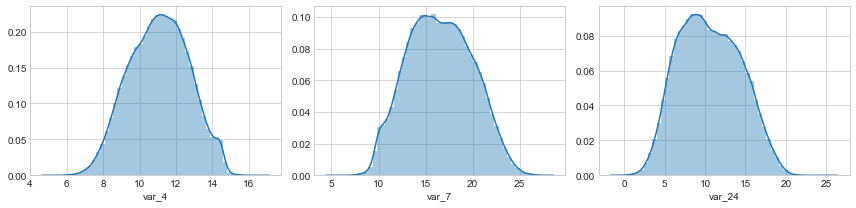

In [157]:
#Let us record old value for comaprisons
df = data[['var_4','var_7','var_24']]
fig,axes = plt.subplots(figsize=(12,3) , ncols = len(df.columns))
for ax,col in zip(axes,df.columns):
    sb.distplot(df[col],ax=ax)
    plt.tight_layout()
plt.savefig('../data/processed/dis_plot_.png',bbox_inches='tight')

# Apply suggested functions to respective columns

In [83]:
print_count = 0 #Flag to print, just prints first 10 entries from this loop, to have a glimpse
for txt in skew_kurt_dic_.keys():
    i = 0 if txt == 'train' else 1 #index for full_data
    for col in skew_kurt_dic_[txt].keys():
        print_count += 1
        if col == 'target':#dependent/target variable
            continue#to next column(skip this)
        if skew_kurt_dic_[txt][col]['maxlabel'] == 'sqrt':
            print('%% sqrt to be applied for ',col)
            full_data[i].loc[:,col] = np.sqrt(full_data[i].loc[:,col])
        elif skew_kurt_dic_[txt][col]['maxlabel'] == 'cbrt':
            print('%% cbrt to be applied for ',col)
            full_data[i].loc[:,col] = np.cbrt(full_data[i].loc[:,col])

        elif skew_kurt_dic_[txt][col]['maxlabel'] == 'log':
            print('%% log to be applied for ',col)
            full_data[i].loc[:,col] = np.log(full_data[i].loc[:,col])
        else:
            print('!! original is the best for ',col)        

!! original is the best for  var_0
!! original is the best for  var_1
!! original is the best for  var_2
!! original is the best for  var_3
%% log to be applied for  var_4
!! original is the best for  var_5
!! original is the best for  var_6
%% log to be applied for  var_7
!! original is the best for  var_8
!! original is the best for  var_9
!! original is the best for  var_10
!! original is the best for  var_11
!! original is the best for  var_12
!! original is the best for  var_13
%% cbrt to be applied for  var_14
!! original is the best for  var_15
!! original is the best for  var_16
!! original is the best for  var_17
!! original is the best for  var_18
!! original is the best for  var_19
!! original is the best for  var_20
!! original is the best for  var_21
!! original is the best for  var_22
%% log to be applied for  var_23
%% cbrt to be applied for  var_24
!! original is the best for  var_25
!! original is the best for  var_26
!! original is the best for  var_27
!! original is 

In [92]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,2.393902,-5.065317,5.408949,2.783924,0.284162,...,3.234440,7.438408,1.927839,3.331774,2.874267,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,0.150443,7.863267,0.866607,0.213609,3.332634,...,4.559922,3.023272,1.478423,3.992030,0.179656,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,1.624287,-32.562600,2.347300,1.677040,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,2.162679,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,2.290834,-11.200350,4.767700,2.635035,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,2.749179,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,2.407688,-4.833150,5.385100,2.800739,0.393700,...,3.203600,7.347750,1.901300,3.396350,2.888033,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,2.506434,0.924800,6.003000,2.949840,2.937900,...,6.406200,9.512525,2.949500,6.205800,3.015365,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,2.813695,17.251600,8.447700,3.321136,10.151300,...,18.440900,16.716500,8.402400,18.281800,3.329658,4.272900,18.321500,12.000400,26.079100,28.500700


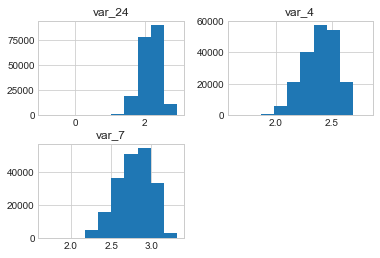

In [159]:
#Histogram after processing
data[['var_4','var_7','var_24']].hist()
plt.savefig('../data/processed/hist_after.png',bbox_inches='tight')

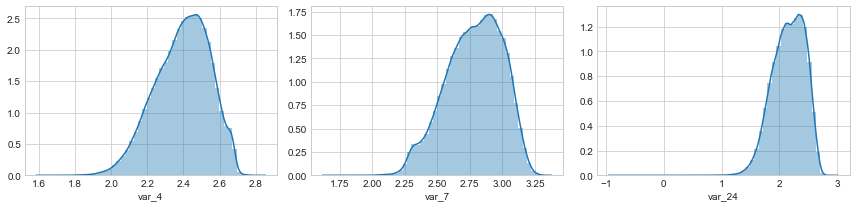

In [160]:
#Let us record new ones
df = data[['var_4','var_7','var_24']]
fig,axes = plt.subplots(figsize=(12,3) , ncols = len(df.columns))
for ax,col in zip(axes,df.columns):
    sb.distplot(df[col],ax=ax)
    plt.tight_layout()
plt.savefig('../data/processed/dis_plot_after.png',bbox_inches='tight')

## That looks nice
Now the columns are relatively closer to a normal distribution

## Bi-variate analysis

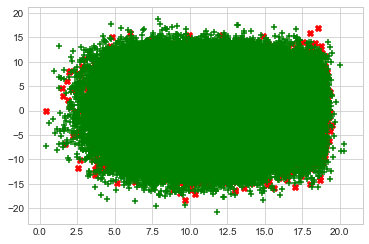

In [161]:
#Let us plot scatterplots to see how our decision boundary going to be
df0 = data[data['target'] == 0]
df1 = data[data['target'] == 1]

plt.scatter(df1['var_0'], df1.var_10, marker='X',color='red')
plt.scatter(df0['var_0'], df0.var_10, marker='+',color='green')
plt.savefig('../data/processed/scatter_var0.png',bbox_inches='tight')

## not a very good news, they are overlapping :(
Difficult to draw a boundary b/w them

# Plot the scattermatrix

In [168]:
# we need to plot the scatter plots, but we will go ahead with most correlated features only
corr = data.corr()


In [176]:
#Top positive corr
corr['target'].nlargest(5)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
Name: target, dtype: float64

In [177]:
#Top 10 corr(pos and negative both included, just magnitude is considered)
abs(corr['target']).nlargest(10)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
Name: target, dtype: float64

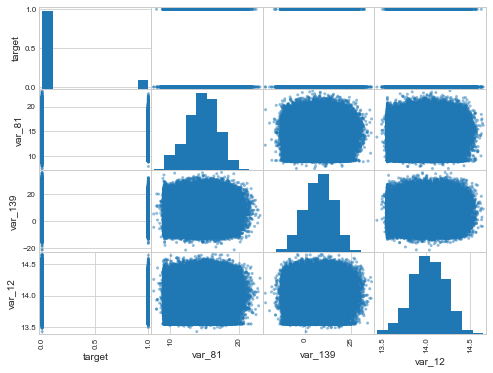

In [183]:
#Take the top most corr features(pos or neg) and plot
attributes = ["target","var_81","var_139","var_12"]
scatter_matrix(data[attributes], figsize=(8,6))
plt.savefig('../data/processed/scatter_mat_before.png',bbox_inches='tight')

## Outlier analysis for continous variables

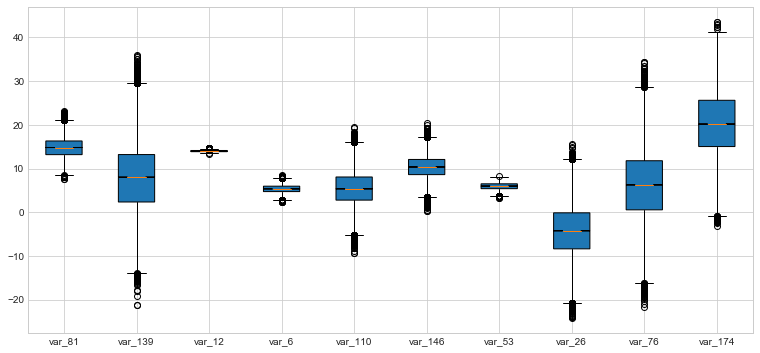

In [195]:
# Take a subset of most correlated features and plot, since original data is huge
larg_10 = abs(corr['target']).nlargest(11)

train_top10 = data[larg_10.index.values]#subset of top 10
train_top10 = train_top10.drop(['target'],axis=1)
plot = []
for i in train_top10.columns:
    plot.append(list(train_top10.loc[:,i]))
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=train_top10.columns)
rcParams['figure.figsize']=13,6
plt.savefig('../data/processed/boxplot_before.png',bbox_inches='tight')

In [196]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,2.438924,-9.2834,5.1187,2.924591,-4.9200,...,4.4354,3.9642,3.1364,1.6910,2.918997,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,2.514643,7.0433,5.6208,2.805407,3.1468,...,7.6421,7.7214,2.5837,10.9516,2.736346,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,2.359202,-9.0837,6.9427,2.682083,-4.9193,...,2.9057,9.7905,1.6704,1.6858,3.072888,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,2.532474,-1.8361,5.8428,2.703038,-5.8609,...,4.4666,4.7433,0.7178,1.4214,3.137002,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,2.507744,2.4486,5.9405,2.957584,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,2.586831,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [84]:
#Replace outlier with mean in both train and test dataframes
continous_names = [ x for x in data.columns if x not in ['target']]
outliers =[]
for i in continous_names:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr* 1.5)#lower fence
    max = q25 + (iqr* 1.5)#upper fence
   
    
    print('-----Thes will be droppped for col :',i,'\n',data[data.loc[:,i] >max].head(2))
    print(min,max)
    outliers.append('per outliers for %s is %s'%(i, ( (len(data[data.loc[:,i] > max])/len(data)) )*100 ))
    outliers.append('per outliers for %s is %s'%(i, ( (len(data[data.loc[:,i] < min])/len(data)) )*100 ))
    data.loc[data.loc[:,i]<min,i] = data.loc[:,i].mean()#Replace with mean
    data.loc[data.loc[:,i]<max,i] = data.loc[:,i].mean()
    #train_df = train_df.drop(train_df[train_df.loc[:,i] > max].index) #for dropping
    test.loc[test.loc[:,i]<min,i] = test.loc[:,i].mean()#Replace with mean
    test.loc[test.loc[:,i]<max,i] = test.loc[:,i].mean()

-----Thes will be droppped for col : var_0 
     target    var_0   var_1    var_2   var_3     var_4   var_5   var_6  \
8        0  16.1071  2.4426  13.9307  5.6327  2.174911  6.1630  4.4514   
13       1  16.3699  1.5934  16.7395  7.3330  2.496918  5.9004  4.8222   

       var_7   var_8  ...  var_190  var_191  var_192  var_193   var_194  \
8   2.320955 -3.1882  ...   1.4298  14.7510   1.6395   1.4181  2.697124   
13  3.043231  1.1064  ...   7.4002   7.4031   4.3989   4.0978  2.854388   

    var_195  var_196  var_197  var_198  var_199  
8   -1.9940  -1.0733   8.1975  19.5114   4.8453  
13  -1.3022   9.6846   9.0419  15.6064 -10.8529  

[2 rows x 201 columns]
1.9973250000000018 14.910375
-----Thes will be droppped for col : var_1 
     target      var_0   var_1    var_2   var_3     var_4   var_5   var_6  \
14       0  10.681978  5.0514  17.2611  8.5120  2.553476 -9.1622  5.7327   
28       0  10.681978  4.5262   8.9291  8.4884  2.552838 -1.2632  5.0383   

       var_7   var_8  ...  va

-----Thes will be droppped for col : var_12 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
19       0  10.681978 -1.627241  15.182800  6.797044  2.395779 -5.064806   
23       0  15.002900 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
19  5.409608  2.784757  0.284269  ...   5.9745   6.3267   2.5156   8.9878   
23  5.409608  2.784757  0.284269  ...   2.9210   4.3916   5.2208   1.3458   

     var_194  var_195  var_196  var_197  var_198  var_199  
19  2.776020  -2.1962   8.3985   9.1711  14.7352   3.9133  
23  2.906573   2.3865  -3.7144   9.4714  12.8480 -10.0357  

[2 rows x 201 columns]
13.488700000000001 14.299299999999999
-----Thes will be droppped for col : var_13 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
80       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
92       0  10.681978 -1.627241  10.715673  6.797044 

-----Thes will be droppped for col : var_23 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
6        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
11       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
6   5.409608  2.784757  0.284269  ...   8.7830   6.4521   3.5325   0.1777   
11  5.409608  2.784757  0.284269  ...  -0.8901   2.6559  -0.0503   5.5946   

     var_194  var_195  var_196  var_197  var_198  var_199  
6   2.908615   0.5845   9.1104   9.1143  10.8869  -3.2097  
11  2.611187   2.4058  -1.7183   9.6745  16.7498  -3.9728  

[2 rows x 201 columns]
0.5840152373137604 1.3530678980313753
-----Thes will be droppped for col : var_24 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
21       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
24       0  10.681978 -1.627241  10.715673  6.797044 

-----Thes will be droppped for col : var_36 
    target      var_0     var_1      var_2     var_3     var_4     var_5  \
3       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
8       0  16.107100 -1.627241  10.715673  6.797044  2.395779 -5.064806   

      var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
3  5.409608  2.784757  0.284269  ...   4.4666   4.7433   0.7178   1.4214   
8  5.409608  2.784757  0.284269  ...   1.4298  14.7510   1.6395   1.4181   

    var_194  var_195  var_196  var_197  var_198  var_199  
3  3.137002  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
8  2.697124  -1.9940  -1.0733   8.1975  19.5114   4.8453  

[2 rows x 201 columns]
-6.7084125000000006 6.6941625
-----Thes will be droppped for col : var_37 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
17       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
18       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.0648

-----Thes will be droppped for col : var_49 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
19       0  10.681978 -1.627241  15.182800  6.797044  2.395779 -5.064806   
45       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
19  5.409608  2.784757  0.284269  ...   5.9745   6.3267   2.5156   8.9878   
45  5.409608  2.784757  0.284269  ...   4.1395   2.3070   0.3339  -3.8902   

     var_194  var_195  var_196  var_197  var_198  var_199  
19  2.776020  -2.1962   8.3985   9.1711  14.7352   3.9133  
45  3.016662  -0.6471   4.8620   9.2314  20.0579  -7.3688  

[2 rows x 201 columns]
-7.189887499999999 28.496837499999998
-----Thes will be droppped for col : var_50 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
7        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
29       1  10.681978 -1.627241  10.715673  6.797044 

-----Thes will be droppped for col : var_61 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
17       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
34       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
17  5.409608  2.784757  0.284269  ...   7.4363  11.3072   3.7903   0.0290   
34  5.409608  2.784757  0.284269  ...   5.2832  10.4764   2.4155   0.6457   

     var_194  var_195  var_196  var_197  var_198  var_199  
17  2.790883   0.1470   8.9603   9.4560  19.4505  -5.2407  
34  3.134520   0.5484  -3.8839  10.1522  12.5311   2.9641  

[2 rows x 201 columns]
-47.4161375 5.6126875
-----Thes will be droppped for col : var_62 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
10       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
12       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064

-----Thes will be droppped for col : var_74 
    target      var_0     var_1      var_2     var_3     var_4     var_5  \
0       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
8       0  16.107100 -1.627241  10.715673  6.797044  2.395779 -5.064806   

      var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
0  5.409608  2.784757  0.284269  ...   4.4354   3.9642   3.1364   1.6910   
8  5.409608  2.784757  0.284269  ...   1.4298  14.7510   1.6395   1.4181   

    var_194  var_195  var_196  var_197  var_198  var_199  
0  2.918997  -2.3978   7.8784   8.5635  12.7803  -1.0914  
8  2.697124  -1.9940  -1.0733   8.1975  19.5114   4.8453  

[2 rows x 201 columns]
-20.4411125 39.633062499999994
-----Thes will be droppped for col : var_75 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
41       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
57       0  10.681978  4.461900  10.715673  6.797044  2.395779 -5.064

-----Thes will be droppped for col : var_86 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
18       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
25       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
18  5.409608  2.784757  0.284269  ...   9.1843   2.6812   1.8587   4.6929   
25  6.725200  2.784757  0.284269  ...  11.3979   5.9191   0.6406   5.0184   

     var_194  var_195  var_196  var_197  var_198  var_199  
18  2.778297  -1.5336  -4.0958   8.5873  17.1516 -22.1940  
25  3.059721  -2.9616   5.7994   9.5360  17.8582  -3.3911  

[2 rows x 201 columns]
-15.718687500000001 16.533787500000003
-----Thes will be droppped for col : var_87 
    target      var_0     var_1      var_2     var_3     var_4     var_5  \
4       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
5       0  10.681978 -1.627241  10.715673  6.797044  2

-----Thes will be droppped for col : var_98 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
3        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
14       0  10.681978  5.051400  17.261100  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
3   5.409608  2.784757  0.284269  ...   4.4666   4.7433   0.7178   1.4214   
14  5.409608  2.784757  0.284269  ...   1.0740   8.3220   3.2619   1.6738   

     var_194  var_195  var_196  var_197  var_198  var_199  
3   3.137002  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
14  2.861040  -0.0257  -3.5323   9.3439  24.4479  -5.1110  

[2 rows x 201 columns]
-0.2221624999999996 2.7575125
-----Thes will be droppped for col : var_99 
    target      var_0     var_1      var_2     var_3     var_4     var_5  \
3       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
7       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -

-----Thes will be droppped for col : var_110 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
6        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
10       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
6   5.409608  2.784757  0.284269  ...    8.783   6.4521   3.5325   0.1777   
10  5.409608  2.784757  0.284269  ...    7.278   8.0819   0.2139  -0.0761   

     var_194  var_195  var_196  var_197  var_198  var_199  
6   2.908615   0.5845   9.1104   9.1143  10.8869  -3.2097  
10  2.705280  -1.2160   6.6576   9.2553  14.2914  -7.6652  

[2 rows x 201 columns]
-5.112799999999999 10.74775
-----Thes will be droppped for col : var_111 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
37       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
49       0  10.681978 -1.627241  10.715673  6.797044  2.39577

-----Thes will be droppped for col : var_122 
     target      var_0     var_1      var_2      var_3     var_4     var_5  \
46       0  10.681978  4.938400  10.715673   6.797044  2.395779  9.630400   
55       0  10.681978 -1.627241  10.715673  10.249200  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
46  5.409608  2.784757  0.284269  ...   2.6118   7.1341    0.111   0.3199   
55  5.409608  2.784757  0.284269  ...   8.0179   4.5199    3.896  -0.3276   

     var_194  var_195  var_196  var_197  var_198  var_199  
46  3.046967   2.5844   5.4584   9.2559  17.4870 -23.4119  
55  2.697609  -2.3436   9.8899   8.2717  15.2389   2.9903  

[2 rows x 201 columns]
-14.050550000000001 8.92015
-----Thes will be droppped for col : var_123 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
28       0  10.681978  4.526200  10.715673  6.797044  2.395779 -5.064806   
38       0  16.713100 -1.627241  10.715673  6.797044  2.39

[2 rows x 201 columns]
-23.79605 4.544649999999999
-----Thes will be droppped for col : var_135 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
9        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
12       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
9   5.409608  2.784757  0.284269  ...   0.5543   6.3160   1.0371   3.6885   
12  5.409608  2.784757  5.696400  ...   0.3782   7.4382   0.0854   1.3444   

     var_194  var_195  var_196  var_197  var_198  var_199  
9   2.696949   0.4467  14.1287   7.9133  16.2375  14.2514  
12  2.847458  -0.0798   5.7389   8.4897  17.0938   4.6106  

[2 rows x 201 columns]
-26.581675 6.667475
-----Thes will be droppped for col : var_136 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
39       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
58       0  10.681

-----Thes will be droppped for col : var_147 
     target      var_0     var_1      var_2     var_3     var_4    var_5  \
1        0  10.681978 -1.627241  10.715673  6.797044  2.395779   7.0433   
22       0  10.681978 -1.627241  10.715673  6.797044  2.395779  13.8830   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
1   5.409608  2.784757  0.284269  ...   7.6421   7.7214   2.5837  10.9516   
22  5.409608  2.784757  0.284269  ...   1.7022   5.4938  -0.3317   3.3474   

     var_194  var_195  var_196  var_197  var_198  var_199  
1   2.736346   2.0339   8.1267   8.7889  18.3560   1.9518  
22  2.417734   0.9371  -7.5486   9.5064   8.7281 -25.6523  

[2 rows x 201 columns]
-24.921037499999997 7.4181374999999985
-----Thes will be droppped for col : var_148 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
46       0  10.681978  4.938400  10.715673  6.797044  2.395779  9.630400   
71       1  10.681978 -1.627241  10.715673  6.797044 

-----Thes will be droppped for col : var_159 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
7        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
26       0  15.656700 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
7   5.409608  2.784757  0.284269  ...  13.1700   6.5491   3.9906   5.8061   
26  5.409608  2.784757  0.284269  ...   5.3764  11.9099   0.7651   6.9705   

     var_194  var_195  var_196  var_197  var_198  var_199  
7   3.141593  -0.3776   4.2178   9.4237   8.6624   3.4806  
26  3.185232  -1.8420   3.4319   7.8821  19.3055  -7.5090  

[2 rows x 201 columns]
-1.5329750000000022 16.020025000000004
-----Thes will be droppped for col : var_160 
     target      var_0     var_1      var_2     var_3     var_4      var_5  \
19       0  10.681978 -1.627241  15.182800  6.797044  2.395779  -5.064806   
22       0  10.681978 -1.627241  10.715673  6.79

-----Thes will be droppped for col : var_171 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
18       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
35       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
18  5.409608  2.784757  0.284269  ...   9.1843   2.6812   1.8587   4.6929   
35  5.409608  2.784757  0.284269  ...   4.3164  10.6811   1.3953   7.4976   

     var_194  var_195  var_196  var_197  var_198  var_199  
18  2.778297  -1.5336  -4.0958   8.5873  17.1516 -22.1940  
35  2.753514  -0.9616   8.6242   9.1201   9.1214  -2.9564  

[2 rows x 201 columns]
-16.236075 6.795375
-----Thes will be droppped for col : var_172 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
48       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
89       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064

-----Thes will be droppped for col : var_183 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
54       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
64       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...  var_190  var_191  var_192  var_193  \
54  5.409608  2.784757  0.284269  ...   3.4699   2.9464   1.1054   5.5672   
64  5.409608  2.784757  0.284269  ...   7.2294   7.6200   1.3270   3.1466   

     var_194  var_195  var_196  var_197  var_198  var_199  
54  3.158650  -0.6163   7.7492   9.6129  19.1277  10.9683  
64  2.440023  -1.0407  -2.7492  10.1731  15.9919  10.2840  

[2 rows x 201 columns]
-4.6333874999999995 15.4795875
-----Thes will be droppped for col : var_184 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
14       0  10.681978  5.051400  17.261100  6.797044  2.395779 -5.064806   
26       0  15.656700 -1.627241  10.715673  6.797044  2.39

-----Thes will be droppped for col : var_196 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
9        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
66       0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   

       var_6     var_7     var_8  ...   var_190   var_191   var_192   var_193  \
9   5.409608  2.784757  0.284269  ...  3.243655  7.439233  1.933123  3.352287   
66  5.409608  2.784757  0.284269  ...  3.243655  7.439233  1.933123  3.352287   

     var_194   var_195  var_196  var_197  var_198  var_199  
9   2.874449 -0.139611  14.1287   7.9133  16.2375  14.2514  
66  2.874449 -0.139611  11.7935   8.4775  15.8591   4.6974  

[2 rows x 201 columns]
-14.7024 10.80855
-----Thes will be droppped for col : var_197 
     target      var_0     var_1      var_2     var_3     var_4     var_5  \
3        0  10.681978 -1.627241  10.715673  6.797044  2.395779 -5.064806   
43       0  10.681978 -1.627241  10.715673  6.797044  2.

In [257]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,2.438924,-9.2834,5.1187,2.924591,-4.9200,...,4.4354,3.9642,3.1364,1.6910,2.918997,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,2.514643,7.0433,5.6208,2.805407,3.1468,...,7.6421,7.7214,2.5837,10.9516,2.736346,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,2.359202,-9.0837,6.9427,2.682083,-4.9193,...,2.9057,9.7905,1.6704,1.6858,3.072888,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,2.532474,-1.8361,5.8428,2.703038,-5.8609,...,4.4666,4.7433,0.7178,1.4214,3.137002,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,2.507744,2.4486,5.9405,2.957584,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,2.586831,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Let's see our target class distribution

No Transaction : 179902 
Transaction : 20098
Ratio Imbalanced


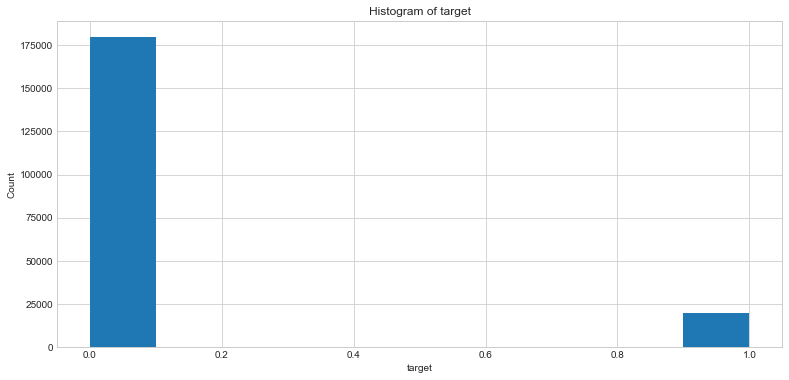

In [199]:
data['target'].hist()
print('No Transaction :',len(data[data['target'] == 0]),'\nTransaction :',len(data[data['target'] == 1]))
print('Ratio %s'%('Balanced' if len(data[data['target'] == 0])/len(data[data['target'] == 1]) <2 else 'Imbalanced'))
plt.xlabel('target') 
plt.ylabel('Count')
plt.title('Histogram of target')
plt.savefig('../data/processed/hist_target.png',bbox_inches='tight')

# Analysis:
Negative case : target = 0 means customer will not make a transaction in future
Positive case : target = 1 means customer will make a transaction in future


Data is imbalanced, need to use techiniques:
-- undersampling - randomly select a sub-sample from negative class to make equal to positive class
--oversampling  - SMOTE to synthesise positive cases 

But here, since postive cases are very less and decreasing our sample set might affect our decision, I choose SMOTE

## Use SMOTE
oversampling to increase the minority class samples i.e. target = 1(Will make a Transaction)

Prerequisite -  See outliers and fix those, or else outlier values will affect data synthesis and more outlier values will be present in resultant dataset



## Get a subsample
Get a stratified sample from both the statums, since the sample datset is huge 

In [85]:
dv= data['target']
rest,sample = train_test_split(data, test_size = 0.1,stratify=dv)
sample.shape

(20000, 201)

In [204]:
sample.head(2)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
125223,0,10.681978,-1.627241,10.715673,6.797044,2.395779,-5.064806,5.409608,2.784757,0.284269,...,10.197600,7.439233,1.933123,3.352287,2.874449,-0.139611,11.961400,10.522000,15.872237,-3.323209
44665,0,10.681978,-1.627241,10.715673,9.947000,2.395779,13.187500,5.409608,2.784757,0.284269,...,3.243655,7.439233,1.933123,3.352287,2.874449,-0.139611,2.303335,8.908295,15.872237,-3.323209


## Approach 1 with train dataframe
Try with all columns as in th original dataset, just reducing the no of observations(using stratified sample generated from above)

In [86]:
smt = SMOTETomek(random_state=42)

#Lets do oversampling for train data

i=0    
iv = sample.drop(['target'],axis=1)
dv = sample['target']
txt ='training data' if i==0 else 'training with top10 attributes'
print('orig ', txt, '(iv)(dv):',iv.shape,dv.shape,'(No,Yes) :',get_fn_ratio(dv))                   
iv_res , dv_res = smt.fit_sample(iv,dv)
print('-----------------------------------------------------')
print('oversampling ','(iv)(dv): ', txt,iv_res.shape,dv_res.shape,'(No,Yes) :',get_fn_ratio(dv_res))                   
iv_oversamp = pd.DataFrame(data=iv_res,columns=iv.columns.values)
dv_oversamp = pd.DataFrame(data=dv_res,columns=dv.to_frame().columns.values)
    
train = pd.concat([iv_oversamp,dv_oversamp],axis=1)
    
        
print('Total samples: ',train.shape)#,train_top10.shape)
#we see now our target vra i.e default is balanced ..Yeah :)

orig  training data (iv)(dv): (20000, 200) (20000,) (No,Yes) : (17990, 2010)
-----------------------------------------------------
oversampling  (iv)(dv):  training data (35980, 200) (35980,) (No,Yes) : (17990, 17990)
Total samples:  (35980, 201)


In [214]:
train.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,10.681978,-1.627241,10.715673,6.797044,2.395779,-5.064806,5.409608,2.784757,0.284269,7.567236,...,7.439233,1.933123,3.352287,2.874449,-0.139611,11.961400,10.522000,15.872237,-3.323209,0
1,10.681978,-1.627241,10.715673,9.947000,2.395779,13.187500,5.409608,2.784757,0.284269,7.567236,...,7.439233,1.933123,3.352287,2.874449,-0.139611,2.303335,8.908295,15.872237,-3.323209,0


In [215]:
print(smote_train.shape)
train.head(2)

(35980, 201)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,10.681978,-1.627241,10.715673,6.797044,2.395779,-5.064806,5.409608,2.784757,0.284269,7.567236,...,7.439233,1.933123,3.352287,2.874449,-0.139611,11.961400,10.522000,15.872237,-3.323209,0
1,10.681978,-1.627241,10.715673,9.947000,2.395779,13.187500,5.409608,2.784757,0.284269,7.567236,...,7.439233,1.933123,3.352287,2.874449,-0.139611,2.303335,8.908295,15.872237,-3.323209,0


In [216]:
#Save the gold
smote_train = train
orig_train = data

In [22]:
continous_names, cat_names = get_col_names(smote_train)

## Correlation analysis

In [23]:
corr = smote_train.loc[:,continous_names].corr()
#plot if needed
#print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
#            square =True,ax=ax,annot = True))

In [250]:
abs(corr['target']).nlargest(10)

target     1.000000
var_6      0.129299
var_110    0.128468
var_53     0.117702
var_2      0.116883
var_22     0.100820
var_133    0.094722
var_78     0.091161
var_99     0.089947
var_21     0.087795
Name: target, dtype: float64

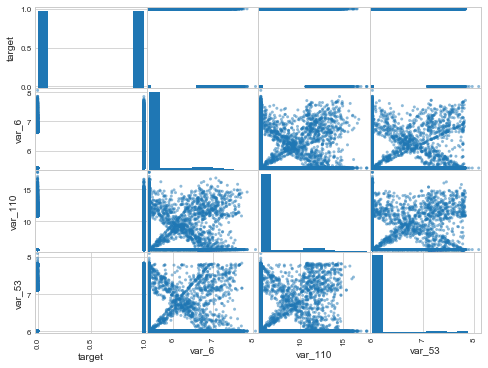

In [252]:
#Take the top most corr features(pos or neg) and plot
attributes = ["target","var_6","var_110","var_53"]
scatter_matrix(smote_train[attributes], figsize=(8,6))
plt.savefig('../data/processed/scatter_mat_after.png',bbox_inches='tight')

## Normalization

In [87]:
#normalize except target in both train and test datasets
bk = smote_train
for i in smote_train.columns:
    if i == 'target':
        continue
    smote_train[i] = (smote_train[i] - smote_train[i].min())/(smote_train[i].max() - smote_train[i].min())
    test[i] = (test[i] - test[i].min())/(test[i].max() - test[i].min())
smote_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
192227,0,0.394657,0.354099,0.660396,0.831914,0.454638,0.534519,0.430096,0.292094,0.731940,...,0.256380,0.680266,0.148181,0.617554,0.358041,0.389838,0.372360,0.522623,0.475872,0.511229
26096,0,0.579193,0.674664,0.706391,0.591648,0.377997,0.762323,0.596118,0.411857,0.388079,...,0.285676,0.728479,0.224801,0.703507,0.590956,0.589556,0.505505,0.521153,0.508496,0.723995
25264,0,0.701954,0.615772,0.366152,0.374628,0.327074,0.545512,0.644642,0.557838,0.317164,...,0.635553,0.739867,0.532678,0.401181,0.238068,0.565781,0.609871,0.392263,0.548466,0.597089
24908,0,0.471646,0.418759,0.596524,0.706244,0.648753,0.617603,0.671652,0.535296,0.494828,...,0.445727,0.492209,0.649957,0.497243,0.687054,0.467821,0.897507,0.445630,0.321196,0.700589
97076,0,0.498604,0.569840,0.353858,0.528191,0.484300,0.759062,0.575420,0.190808,0.787650,...,0.374678,0.781594,0.867754,0.363208,0.321886,0.661202,0.263778,0.746110,0.633508,0.446881


# Alternative approach(Approach 2)
Top 100 features

Let us try taking best 100 features(top 100 correlation values wrt target) into train_top100 dataframe and compare them train dataframe(all 201 features) and see if any significant difference exists

In [30]:
corr_tmp = corr #Automatically take top 100 IV with greater correlation 
new_corr = abs(corr_tmp['target']).nlargest(101).values
larg_100 = abs(corr_tmp['target']).nlargest(101)

#Uncomment and see what all it has 
#larg_10.index.values, larg_10.values,larg_10
train_top100 = smote_train[larg_100.index.values]
train_top100.head(2)

,target,var_6,var_110,var_53,var_2,var_22,var_133,var_78,var_99,var_21,...,var_90,var_4,var_142,var_92,var_8,var_104,var_141,var_15,var_197,var_121
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563857,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
#Saving for future purpose
smote_train.to_csv(processed_data_path,index=False)
#smote_train = pd.read_csv(processed_data_path)
#data.head(1),data.shape
 



# Model Training
We need to split our data for taining and testing

Way1 is using random sampling

Way2 is using Kfolds cross validation

# Measuring the accuracy of model
classification metrics is not a good indication for imbalanced datasets Rather we use ROC 

Recall is also called sensitivity(TP rate - actual positive classes which were correctly classified)

Specificity is also called TN rate(actual negative classes which were correctly classified)

F1 score = combination of recall and specificity 

Depending on the kind of problem you want to solve you may want to maximize either sensitivity or specificity.

confusion matrix considers only a single threshold value to generate a curve vs all possibe classification thresholds are considered for ROC curve

ROC compares TPR(y-axis) vs FPR(x-axis) 
More the area under the curve, better the model 

E.g. Paper published in a Journal positives(admitted) = 250 negatives(not admitted) =250
Based on prob threshold(>0.6 generally) which we set, we classify into classes.

If your model did not do well, then distribution plot for both classes will be overalapping for a significant area and the roc curve will be a 45 degree line, telling that model just did random guessing
TPR = TP / all positives FPR = FP/ all negatives

Curve generation E.g. If threshold is say 0.8,then the area to the right of the curve is admitted and to the left is not admitted 

TPR = 50(red pixels to the right of threshold line)/250(total red(pos) pixels) 

FPR = 0(blue pixels to the right of threshold line)/250(total red(pos) pixels)

plot (FPR,TPR) --> (0,0.2) E.g. If threshold is say 0.5, then the area to the right of the curve is admitted and to the left is not admitted TPR = 230(red pixels to the right of threshold line)/250(total red(pos) pixels)=0.94 FPR = 125(blue pixels to the right of threshold line)/250(total red(pos) pixels)=0.5 plot (FPR,TPR) --> (0.5,0.94) All the possible classificaton thresholds are considered and points are plotted to fit a curve

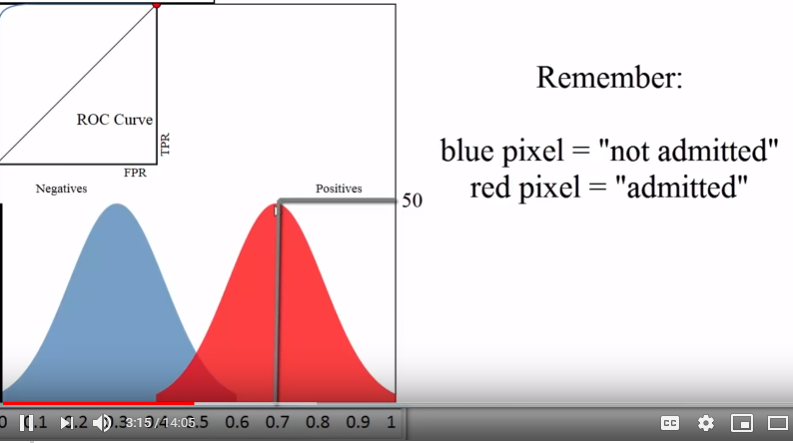
So for good model, curve will be hugging the topmost left corner, more area under the curve and auc should be relatively higher



In [8]:
#Function block
def plot_roc(iv_test,dv_test):
    dv_test_pred_proba = model.predict_proba(iv_test)[::,1]
    fpr, tpr, _ = roc_curve(dv_test,  dv_test_pred_proba)
    auc = roc_auc_score(dv_test,  dv_test_pred_proba)
    print(auc)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()


def cm_analysis(iv_test, dv_test,dv_test_pred):
    #confusion matrix
    #here negative cases(one with malignant cancer) are imp to be diagonsed
    cm = pd.crosstab(dv_test,dv_test_pred)
    print(cm)
   
    acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])#the no of tp+tn/all
    specifity = (cm[1][1]/(cm[1][1]+cm[1][0]))*100#no of negatives correctly classified (Identification of NO cases)
    fnr  = (cm[0][1]/(cm[0][1]+cm[0][0]))*100#no of -ve wrongly classified, i.e. predicted as - but actually positive\
                                             #...wrong info saying he will not make a transaction *****

    recall = (cm[0][0]/(cm[0][1]+cm[0][0]))*100#no of actual +ve classes correctly classified(no of defaulters on loan)****************
    fpr = (cm[1][0]/ (cm[1][0]+cm[1][1]))*100#no of wrong positives , i.e predicted as + but actually negative...Wrongly telling that\
                                            #a customer will make a transaction
   
   
    print('************* Evaluation metrics************: ')
    print('(Specifity) Accuracy in Identifying customers not making a transaction :',specifity )
    print('(FPR) Wrongly telling a customer will make a transaction',fpr )
    print('**(RECALL) Accuracy in Identifying customers making a Transaction',recall )
    print('**(FNR) Wrongly telling a customer will not make a transaction',fnr )

    plot_roc(iv_test,dv_test)



## Way 1: Directly using train_test_split

accuracy  0.7237354085603113
col_0     0     1
row_0            
0      2600  1001
1       987  2608
************* Evaluation metrics************: 
(Specifity) Accuracy in Identifying customers not making a transaction : 72.26378498198947
(FPR) Wrongly telling a customer will make a transaction 27.73621501801053
**(RECALL) Accuracy in Identifying customers making a Transaction 72.48396989127404
**(FNR) Wrongly telling a customer will not make a transaction 27.516030108725953
0.7945681909560742


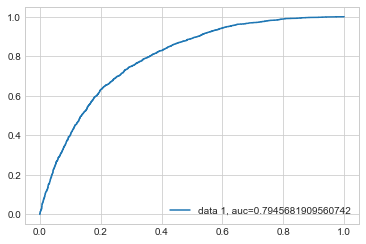

In [9]:
iv = smote_train.drop(['target'],axis=1)
dv= smote_train['target'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2)#way 1

model = LogisticRegression().fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print('accuracy ' ,model.score(iv_test,dv_test))
cm_analysis(iv_test, dv_test,dv_test_pred)

accuracy  0.7636186770428015
col_0     0     1
row_0            
0      2696   889
1       812  2799
************* Evaluation metrics************: 
(Specifity) Accuracy in Identifying customers not making a transaction : 75.89479392624729
(FPR) Wrongly telling a customer will make a transaction 24.10520607375271
**(RECALL) Accuracy in Identifying customers making a Transaction 76.85290763968074
**(FNR) Wrongly telling a customer will not make a transaction 23.14709236031927
0.8338461782087663


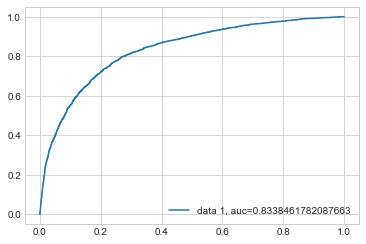

In [12]:
#Way 1: Directly using train_test_split

iv = smote_train.drop(['target'],axis=1)
dv= smote_train['target'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2)#way 1

model = GaussianNB().fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print('accuracy ' ,model.score(iv_test,dv_test))
cm_analysis(iv_test, dv_test,dv_test_pred)

accuracy  0.9448304613674263
col_0     0     1
row_0            
0      3535    50
1       347  3264
************* Evaluation metrics************: 
(Specifity) Accuracy in Identifying customers not making a transaction : 98.49124924562463
(FPR) Wrongly telling a customer will make a transaction 1.508750754375377
**(RECALL) Accuracy in Identifying customers making a Transaction 91.06130860381246
**(FNR) Wrongly telling a customer will not make a transaction 8.938691396187533
0.9799794676656288


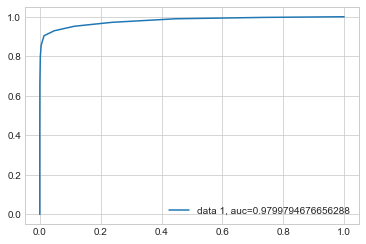

In [11]:
#Way 1: Directly using train_test_split

iv = smote_train.drop(['target'],axis=1)
dv= smote_train['target'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2)#way 1

model = RandomForestClassifier().fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print('accuracy ' ,model.score(iv_test,dv_test))
cm_analysis(iv_test, dv_test,dv_test_pred)

# RESULT
-- RandomForest gives the best results( Recall is highest and fnr is the lowest among all) with auc = 0.98

SVC is the slowest since it becomes O(n^2 * k features), complexity is more and not included here as well

##  Way 2  Using Kfolds
Instead of using random sampling for splitting our data, we can use KFold method with certain no of fold(iterations) and took the average of those for comparisions.

I declared a helper class to test my model with KFolds = 5

In [13]:
#class to extend sklearn classifier
class sklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def train(self, train_iv, train_dv):
        self.clf.fit(train_iv, train_dv)#train on training data
    def predict(self, test_iv):
        return self.clf.predict(test_iv)
    def score(self, iv_test, dv_test):
        return self.clf.score(iv_test, dv_test)
    def feature_importances(self,x, y):
        print(self.clf.fit(x,y).feature_importances_)
    def auc(self,iv_test):
        dv_test_pred_proba = model.predict_proba(pd.DataFrame(data=iv_test,columns=iv_train.columns))[::,1]
        fpr, tpr, _ = roc_curve(dv_test,  dv_test_pred_proba)
        auc = roc_auc_score(dv_test,  dv_test_pred_proba)
        return auc,fpr,tpr
    

In [14]:
SEED=0
NFOLDS =5
kf = KFold(n_splits = 5)
rf_params = {
    'n_estimators': 50
    
}
# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'rbf',
    'C' : 0.25,
    'gamma':0.01
    }

lr_params ={
    'C' :0.1
}


In [15]:
#Since we have the helper class declared, we can call same class with object of respective class, initialize the parameters
#and get the object indentifier for each classifier being passed
#call with object of respective class and initialize the parameters

rf = sklearnHelper(clf = RandomForestClassifier, seed = SEED,params = None)
svm = sklearnHelper(clf=SVC, seed=SEED, params = svc_params)
nb = sklearnHelper(clf=GaussianNB, seed=SEED, params=None)
lr = sklearnHelper(clf = LogisticRegression, seed = SEED,params = lr_params)


In [16]:
def get_oof(data,clf, iv, dv):
    i = 0
    sum_score = 0
    it_score = 0
    sum_auc = 0
    for train_index,test_index in kf.split(range(data.shape[0])):
        iv_train, iv_test, dv_train,dv_test = iv[train_index], iv[test_index]\
                                ,dv[train_index], dv[test_index]
        #print('len ',len(iv_train),len(iv_test),len(dv_train),len(dv_test))   
        clf.train(iv_train, dv_train)
        dv_test_pred = clf.predict(iv_test)
        it_score = clf.score(iv_test, dv_test)
        sum_score += it_score
        print(it_score)
        
        """To be updated later
        auc = clf.auc(iv_test)[0]
        fpr = clf.auc(iv_test)[1]
        tpr = clf.auc(iv_test)[2]
        sum_auc += auc
        print('auc :',auc)
        #auc_for_model.append([auc])
    """
        

    return (sum_score/NFOLDS, sum_auc/NFOLDS,[],[])

def get_max(result):
    #print(result)
    max = 0
    for item in result.values():
        item_ = item[0]
        if max < item_:
            max = item_
    return max

   


## Model performance with all columns passed

In [17]:
iv = smote_train.drop(['target'], axis =1).values
dv = smote_train['target'].values



print('RandomForestClasssifier-------')
rf_avg_score,rf_auc,fpr,tpr = get_oof(smote_train, rf, iv, dv)
print('Average RandomForestClasssifier score', rf_avg_score)

print('SVM-----------------')
svm_avg_score , svm_auc,fpr,tpr = -1,[],0,0#get_oof(smote_train, svm, iv, dv)
#SVM almost does while calculating the distances.
#Time comlexity becomes no_samples^2 * no_features for eac feature it needs to calculates svm,so skipping SVm
print('Average SVM score', svm_avg_score)

print('NAIVE BAYES-----------------')
nb_avg_score,nb_auc,fpr,tpr = get_oof(smote_train, nb, iv, dv)
print('Average nb score', nb_avg_score)

print('logisticRegression--------')
lr_avg_score, lr_auc,fpr,tpr= get_oof(smote_train, lr, iv, dv)
print('Average lr score', lr_avg_score)

print("Training complete")
result = {'RandomForestClasssifier':(rf_avg_score,rf_auc,fpr,tpr),
         'svm':(svm_avg_score,svm_auc,fpr,tpr),
         'naive bayes': (nb_avg_score,nb_auc,fpr,tpr),
         'LogisticRegression':(lr_avg_score,lr_auc,fpr,tpr)}
upd_result = dict((val[0],key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForestClasssifier-------
0.9050861589772096
0.9099499722067815
0.92982212340189
0.9754030016675931
0.9772095608671484
Average RandomForestClasssifier score 0.9394941634241245
SVM-----------------
Average SVM score -1
NAIVE BAYES-----------------
0.703307392996109
0.6992773763201778
0.730544747081712
0.8368538076709283
0.8317120622568094
Average nb score 0.7603390772651474
logisticRegression--------
0.6197887715397443
0.6211784324624792
0.6956642579210672
0.5585047248471373
0.5409949972206781
Average lr score 0.6072262367982212
Training complete
%%%%%%%%%% BEST model : RandomForestClasssifier -----score 0.9394941634241245


## Model performance with top 100 feature

In [31]:
iv = train_top100.drop(['target'], axis =1).values
dv = train_top100['target'].values



print('RandomForestClasssifier-------')
rf_avg_score,rf_auc,fpr,tpr = get_oof(train_top100, rf, iv, dv)
print('Average RandomForestClasssifier score', rf_avg_score)

print('SVM-----------------')
svm_avg_score , svm_auc,fpr,tpr = -1,[],0,0#get_oof(train_top100, svm, iv, dv)
#SVM almost does while calculating the distances.
#Time comlexity becomes no_samples^2 * no_features for eac feature it needs to calculates svm,so skipping SVm
print('Average SVM score', svm_avg_score)

print('NAIVE BAYES-----------------')
nb_avg_score,nb_auc,fpr,tpr = get_oof(train_top100, nb, iv, dv)
print('Average nb score', nb_avg_score)

print('logisticRegression--------')
lr_avg_score, lr_auc,fpr,tpr= get_oof(train_top100, lr, iv, dv)
print('Average lr score', lr_avg_score)

print("Training complete")
result = {'RandomForestClasssifier':(rf_avg_score,rf_auc,fpr,tpr),
         'svm':(svm_avg_score,svm_auc,fpr,tpr),
         'naive bayes': (nb_avg_score,nb_auc,fpr,tpr),
         'LogisticRegression':(lr_avg_score,lr_auc,fpr,tpr)}
upd_result = dict((val[0],key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForestClasssifier-------
0.8991106170094497
0.9039744302390217
0.9253752084491385
0.9767926625903279
0.975958866036687
Average RandomForestClasssifier score 0.936242356864925
SVM-----------------
Average SVM score -1
NAIVE BAYES-----------------
0.6536964980544747
0.6592551417454141
0.6871873262923847
0.7948860478043357
0.7907170650361312
Average nb score 0.717148415786548
logisticRegression--------
0.6054752640355753
0.6118677042801557
0.6938576987215119
0.5412729294052251
0.5163979988882713
Average lr score 0.5937743190661479
Training complete
%%%%%%%%%% BEST model : RandomForestClasssifier -----score 0.936242356864925


# train beats train_top100
Model gives best performance when all features are passed, rather than top 100 correlated one, since the corr itself is very low

## Plot feature importances in randomforest
We selected SVM, but just for info sake lets plot this also

In [39]:
iv = data.drop(['target'],axis=1)
dv=data['target'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2)#way 1
model = RandomForestClassifier().fit(iv_train, dv_train)
#f = pd.DataFrame(model.feature_importances_.reshape(1,-1),columns=data.drop(['Survived'],axis=1).columns.values)
cols = data.drop(['target'],axis=1).columns
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': model.feature_importances_})
feature_dataframe.head(1)



,features,Random Forest feature importances
0,var_0,0.007006


In [40]:
model.score(iv_test,dv_test)

0.89995

In [49]:
#model.feature_importances_

trace = go.Scatter(y = feature_dataframe['Random Forest feature importances'].values,
                  x = feature_dataframe['features'].values,
                  mode = 'markers',
                  marker = dict(sizemode = 'diameter', sizeref = 1,size = 25,
                                color = feature_dataframe['Random Forest feature importances'].values,
                                colorscale='Portland',showscale=True),
                  text = feature_dataframe['features'].values)
layout = go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)
plt.savefig('../data/processed/rf_feature_imp.png',bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

## It's time to predict the result for test data
Now that we know RandomForest fits better, we can use all of the train data to feed the model
 

In [64]:

iv = data.drop(['target'],axis=1)
dv=data['target'].values
iv_test = test#.drop(['target'],axis=1)
model = RandomForestClassifier().fit(iv,dv)#Train the model using full training excel
#Let's predict for actual test data
dv_test_pred = model.predict(iv_test)
iv_test['target'] = dv_test_pred

#write back the results
iv_test.to_csv(submitted_data_path,index=False)



## FUN ACTIVITY : Just to compare
Without any pre-processing on data, naive bayes is performing the best and randomforest score goes down. One possible reason could be the corelation being very low, relative to the processed data

In [67]:
#take a stratified sample
dv= data['target']
rest,sample = train_test_split(data, test_size = 0.1,stratify=dv)
smote_train = sample.drop(['ID_code'], axis =1)#smote_train points to sample created above from whole training set

iv = smote_train.drop(['target'], axis =1).values#Get the independent and dependent variables
dv = smote_train['target'].values


#Start fitting the models
print('RandomForestClasssifier-------')
rf_avg_score,rf_auc,fpr,tpr = get_oof(smote_train, rf, iv, dv)
print('Average RandomForestClasssifier score', rf_avg_score)

print('SVM-----------------')
svm_avg_score , svm_auc,fpr,tpr = -1,[],0,0#get_oof(smote_train, svm, iv, dv)
#SVM almost does while calculating the distances.
#Time comlexity becomes no_samples^2 * no_features for eac feature it needs to calculates svm,so skipping SVm
print('Average SVM score', svm_avg_score)

print('NAIVE BAYES-----------------')
nb_avg_score,nb_auc,fpr,tpr = get_oof(smote_train, nb, iv, dv)
print('Average nb score', nb_avg_score)

print('logisticRegression--------')
lr_avg_score, lr_auc,fpr,tpr= get_oof(smote_train, lr, iv, dv)
print('Average lr score', lr_avg_score)

print("Training complete")
result = {'RandomForestClasssifier':(rf_avg_score,rf_auc,fpr,tpr),
         'svm':(svm_avg_score,svm_auc,fpr,tpr),
         'naive bayes': (nb_avg_score,nb_auc,fpr,tpr),
         'LogisticRegression':(lr_avg_score,lr_auc,fpr,tpr)}
upd_result = dict((val[0],key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForestClasssifier-------
0.9015
0.89975
0.891
0.898
0.9055
Average RandomForestClasssifier score 0.89915
SVM-----------------
Average SVM score -1
NAIVE BAYES-----------------
0.91975
0.925
0.91225
0.91775
0.92625
Average nb score 0.9201999999999998
logisticRegression--------
0.91125
0.91375
0.905
0.9095
0.918
Average lr score 0.9115
Training complete
%%%%%%%%%% BEST model : naive bayes -----score 0.9201999999999998
